## Import libraries and dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
import pprint
%matplotlib inline

In [64]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Clean the dataset
### Check for null and duplicate values

In [65]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [66]:
df.duplicated().any()

False

### Get dataframe information and shape

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [68]:
df.shape

(918, 12)

### Statistics

In [69]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [70]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [71]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

### Correlation Matrix

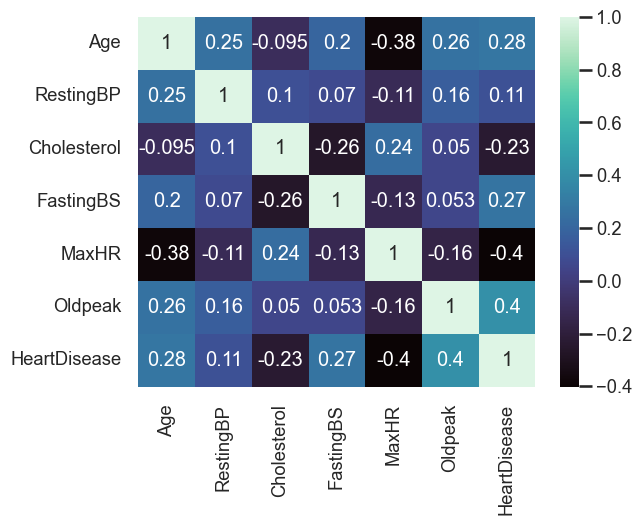

In [88]:
sns.set_theme(context="talk",font_scale=0.8)
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.show()

In [42]:
cat_value = []
cont_value = []

for column in df.columns:
    if len(df[column].unique())<=5:
        cat_value.append(column)
    else:
        cont_value.append(column)

## Plotting Continous Data

In [43]:
cont_value

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [115]:
def dist_plot(data,title):
    sns.set_theme(context="notebook",palette="Blues_r",style="darkgrid")
    sns.histplot(data,kde=True,stat="count")
    plt.title(title)
    plt.show()

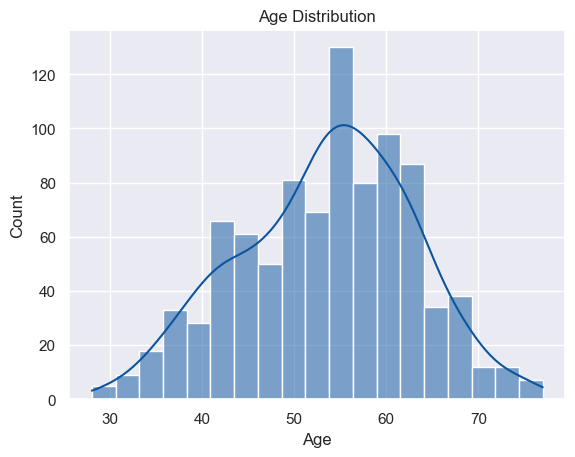

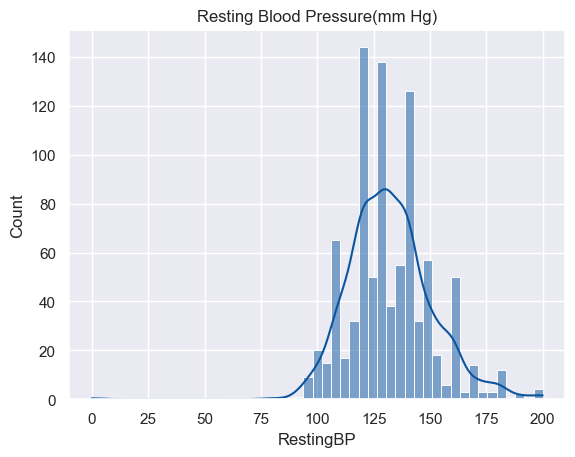

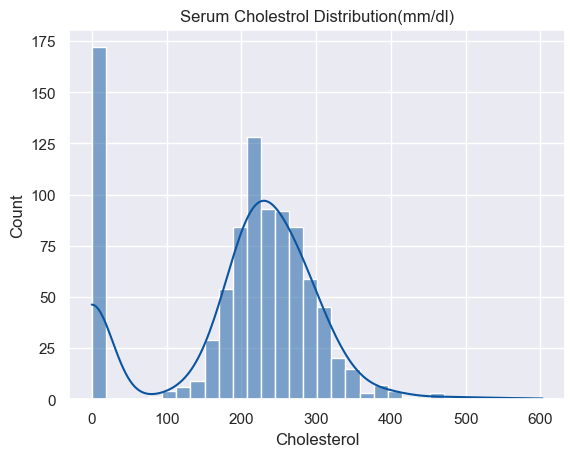

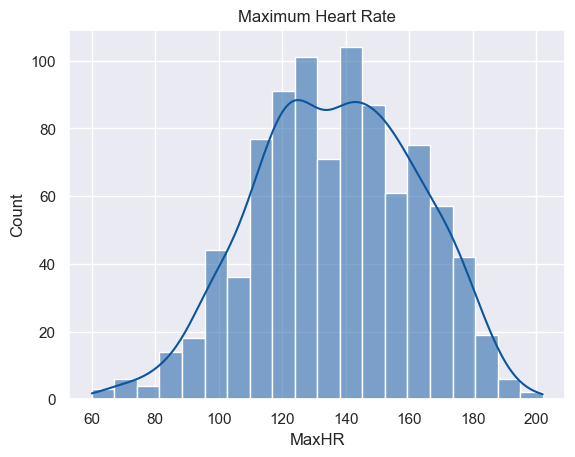

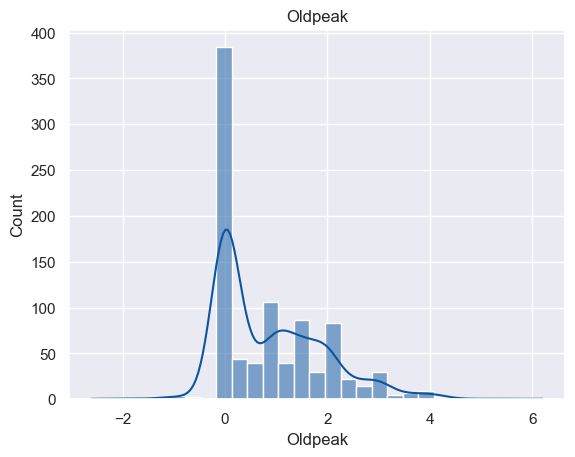

In [116]:
dist_plot(df["Age"],"Age Distribution")
dist_plot(df["RestingBP"], "Resting Blood Pressure(mm Hg)")
dist_plot(df["Cholesterol"], "Serum Cholestrol Distribution(mm/dl)")
dist_plot(df["MaxHR"],"Maximum Heart Rate")
dist_plot(df["Oldpeak"],"Oldpeak")

In [48]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### How many people have heart disease and how many don't?

In [100]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

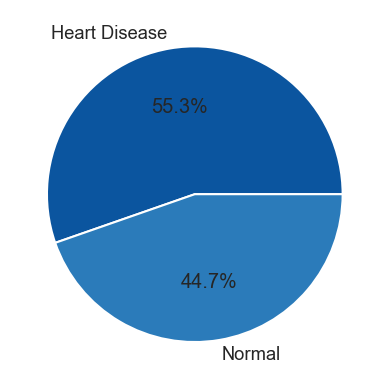

In [122]:
sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
plt.pie(df["HeartDisease"].value_counts(),autopct="%1.1f%%",labels=["Heart Disease","Normal"])

plt.show()

In [50]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [51]:
# df["Cholesterol"].replace(0,"Nan",inplace=True)

In [52]:
# df['Cholesterol'].value_counts()

## Plotting Catergorical Data

### Gender Dsitribution according to Heart Disease

In [117]:
def count_plot(xvalue,title):
    sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
    sns.countplot(data=df,x=xvalue,hue="HeartDisease")
    plt.legend(labels=["Normal","Heart Disease"])
    plt.title(f"{title} Distribution According to Heart Disease")
    plt.show()

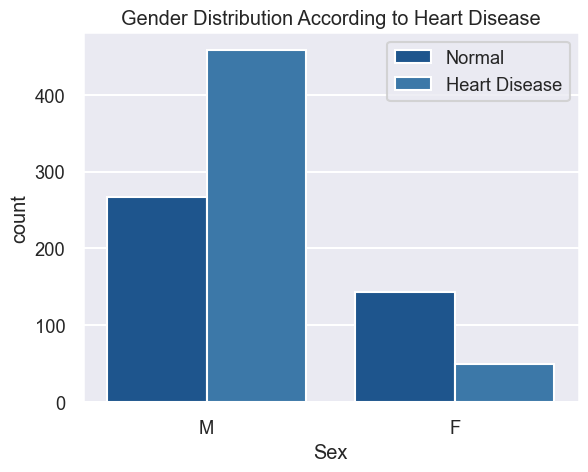

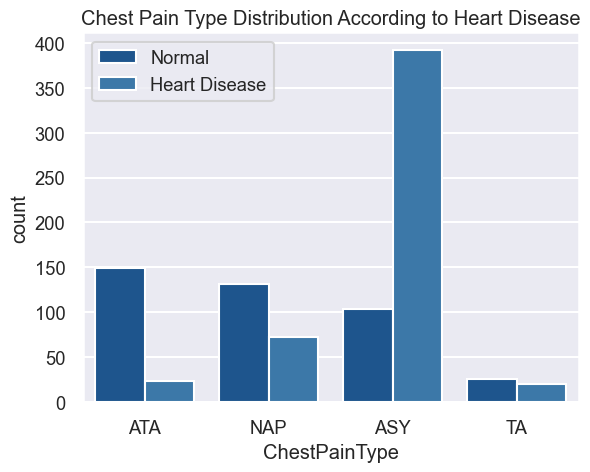

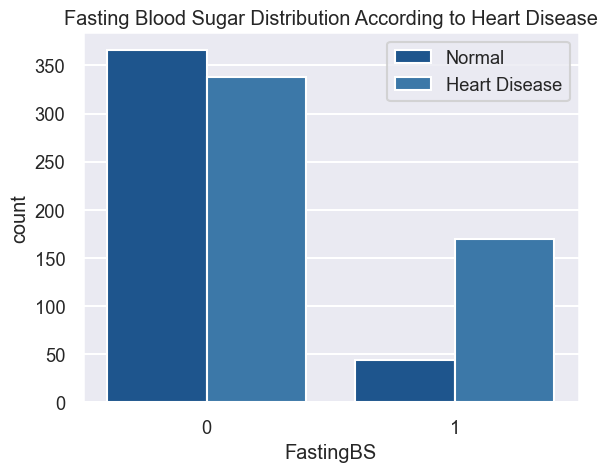

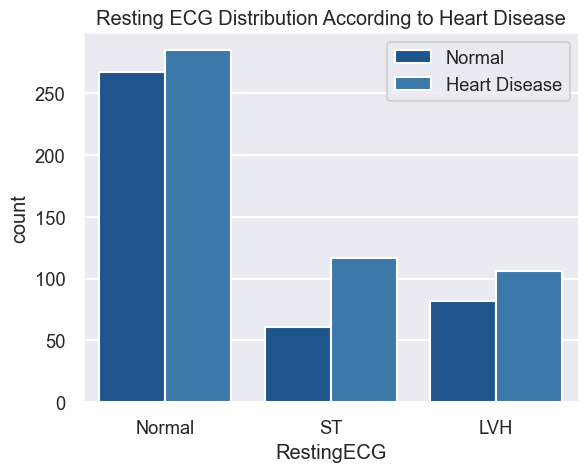

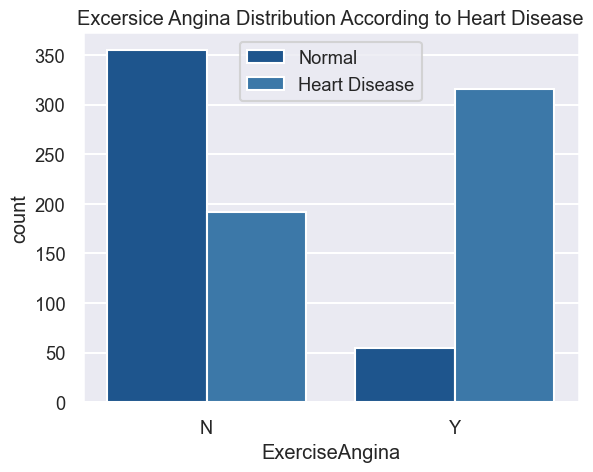

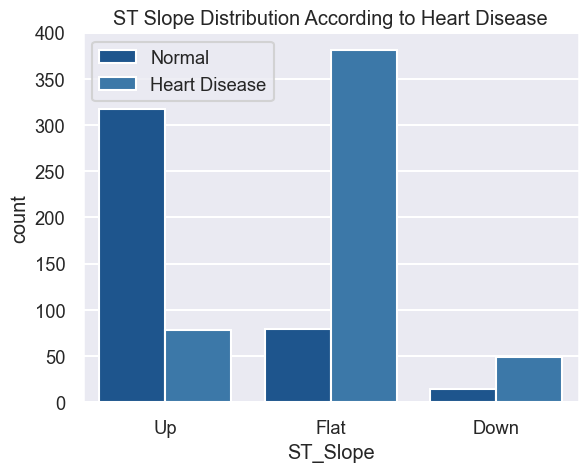

In [118]:
count_plot(df["Sex"],"Gender")
count_plot(df["ChestPainType"],"Chest Pain Type")
count_plot(df["FastingBS"],"Fasting Blood Sugar")
count_plot(df["RestingECG"],"Resting ECG")
count_plot(df['ExerciseAngina'],"Excersice Angina")
count_plot(df['ST_Slope'],"ST Slope")


## Statistical Analysis

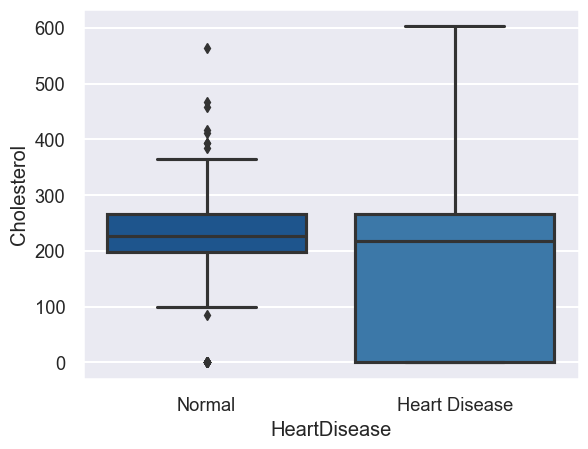

In [119]:
sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
sns.boxplot(x=df["HeartDisease"],y=df["Cholesterol"])
plt.xticks([0,1],["Normal","Heart Disease"])
plt.show()

In [21]:
t_stats,p_value=st.ttest_ind(df["HeartDisease"],df["Cholesterol"])
print(f"T-Statistics is {t_stats}\n")
print(f"P-Value is {p_value}")

T-Statistics is -54.91200727437474

P-Value is 0.0


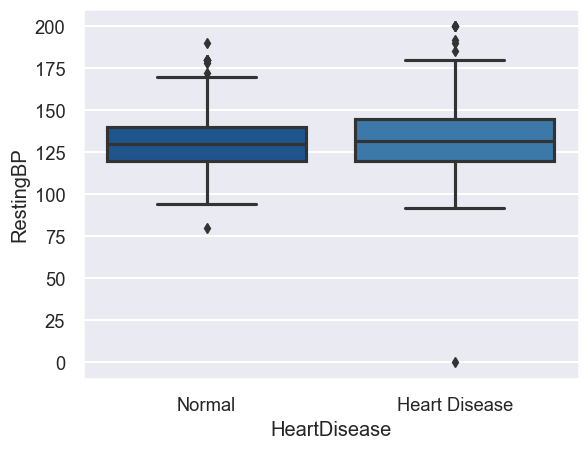

In [120]:
sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
sns.boxplot(x=df["HeartDisease"],y=df["RestingBP"])
plt.xticks([0,1],["Normal","Heart Disease"])
plt.show()

In [23]:
normal=df[df["HeartDisease"]==0]["RestingBP"]
heart_disease=df[df["HeartDisease"]==1]["RestingBP"]

anova_stats,anova_pvalue=st.f_oneway(normal,heart_disease)
print(f"Anova-Statistics is {round(anova_stats,3)}\n")
print(f"Anova P-Value is {round(anova_pvalue,3)}")

Anova-Statistics is 10.727

Anova P-Value is 0.001


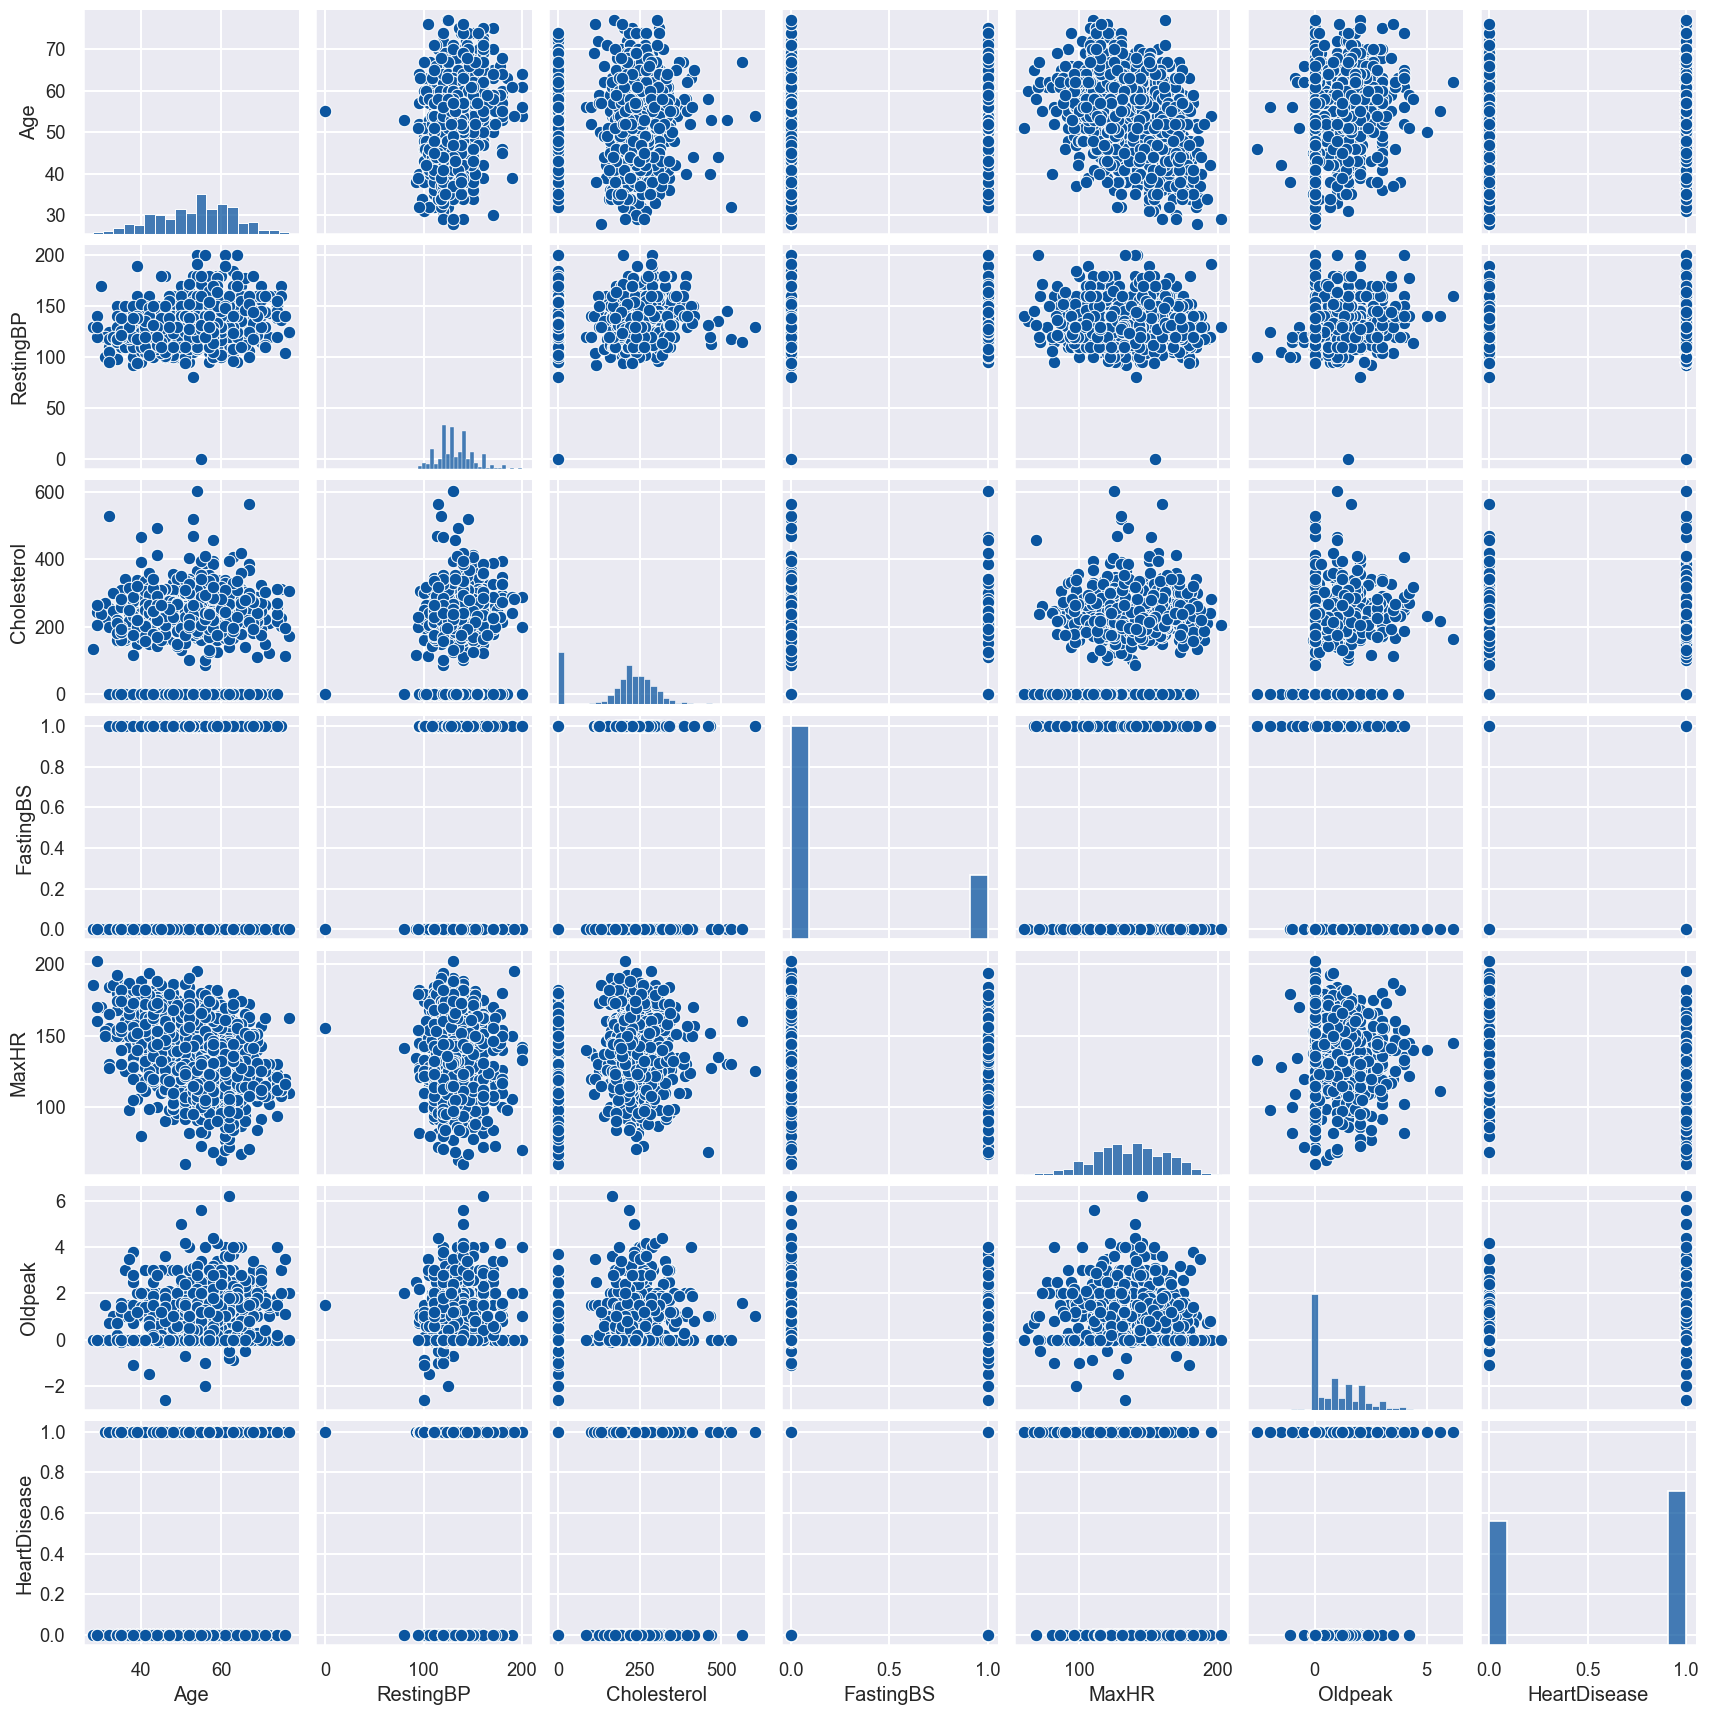

In [121]:
sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
sns.pairplot(df)
plt.show()